In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)

In [17]:
'''
first we test the core/interface extractor, since it is most essential
'''
import sys
sys.path.append('..')
%matplotlib inline
from eden.converter.graph.gspan import gspan_to_eden
from eden.converter.molecule.obabel import obabel_to_eden, obabel_to_eden3d
from graphlearn import graphtools as gt
from eden.util import display
from eden.modifier.graph.vertex_attributes import colorize  
import graphlearn.utils.draw as myutils
import eden.graph as eg
import graphlearn.graphlearn as gl
import numpy as np

from eden.graph import Vectorizer
vectorizer=Vectorizer()

#get a graph
graphs_gspan    = gspan_to_eden( 'bursi.pos.gspan' )
graphs_obabel   = obabel_to_eden('AID2801_active.sdf')
graphs_obabel3d = obabel_to_eden3d('AID2801_active.sdf', vector_label='vector_label')
graph_gspan = graphs_gspan.next()
graph_obabel = graphs_obabel.next()
graph_obabel3d = graphs_obabel3d.next()


In [18]:
# Colour graphs
graphs_gspan    = colorize([graph_gspan],output_attribute = 'color_level', labels = ['C','O','N','P','Cl','Br','S'])
graphs_obabel   = colorize([graph_obabel],output_attribute = 'color_level', labels = ['Car','So2','F', 'O2','O3','Nar','Npl','C3'])
graphs_obabel3d = colorize([graph_obabel3d],output_attribute = 'color_level', labels = ['Car','So2','F', 'O2','O3','Nar','Npl','C3'])
graph_gspan  = graphs_gspan.next()
graph_obabel = graphs_obabel.next()
graph_obabel3d = graphs_obabel3d.next()

We work on this graph


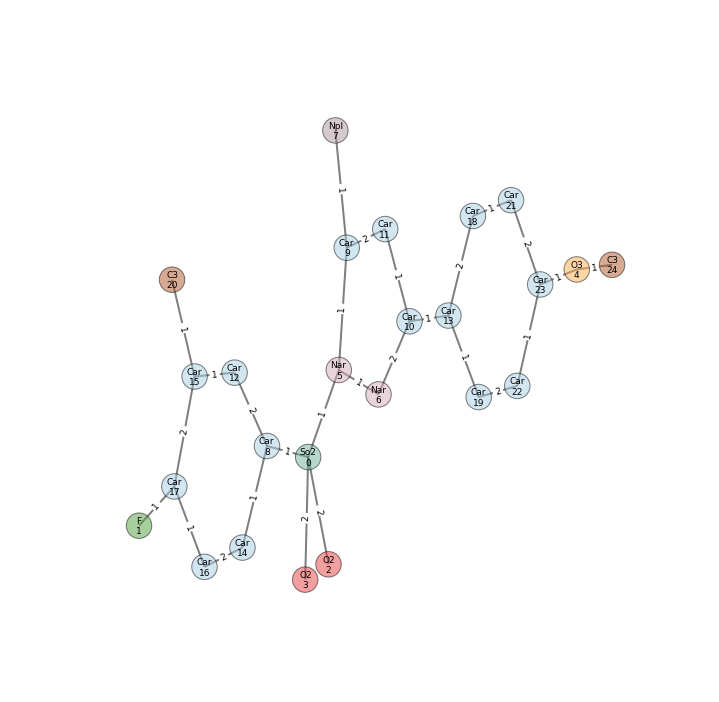

In [19]:
print "We work on this graph"

display.draw_graph(graph_obabel3d, size=12, secondary_vertex_label='ID',
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                   vertex_alpha=0.5, node_size=650)

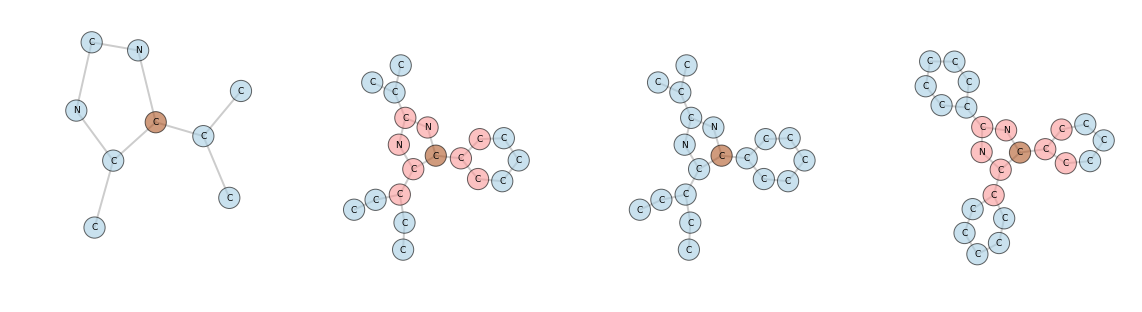

In [6]:
def mark_and_draw(cip):
    graph = myutils.cip_to_graph(cip)
    myutils.draw_graph_set_graphlearn(graph, 
                           n_graphs_per_line=7, size=5, 
                           colormap='Paired', invert_colormap=False,node_border=1,
                           vertex_alpha=0.6, edge_alpha=0.2, node_size=450)
    
radius_list    = [0,2]
thickness_list = [2,4]
cip = gl.extract_core_and_interface(1, graph_gspan, radius_list=radius_list, thickness_list=thickness_list,
                                    vectorizer=vectorizer)
mark_and_draw(cip)

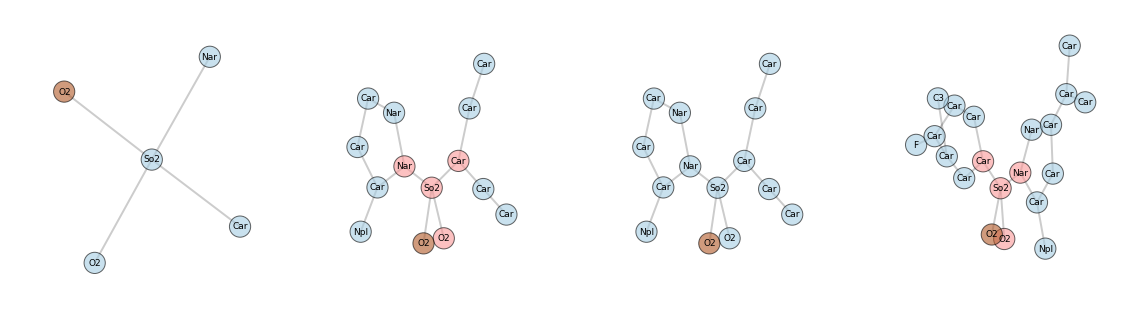

In [7]:
cip = gl.extract_core_and_interface(3, graph_obabel3d, radius_list=radius_list, thickness_list=thickness_list, vectorizer=vectorizer)
mark_and_draw(cip)

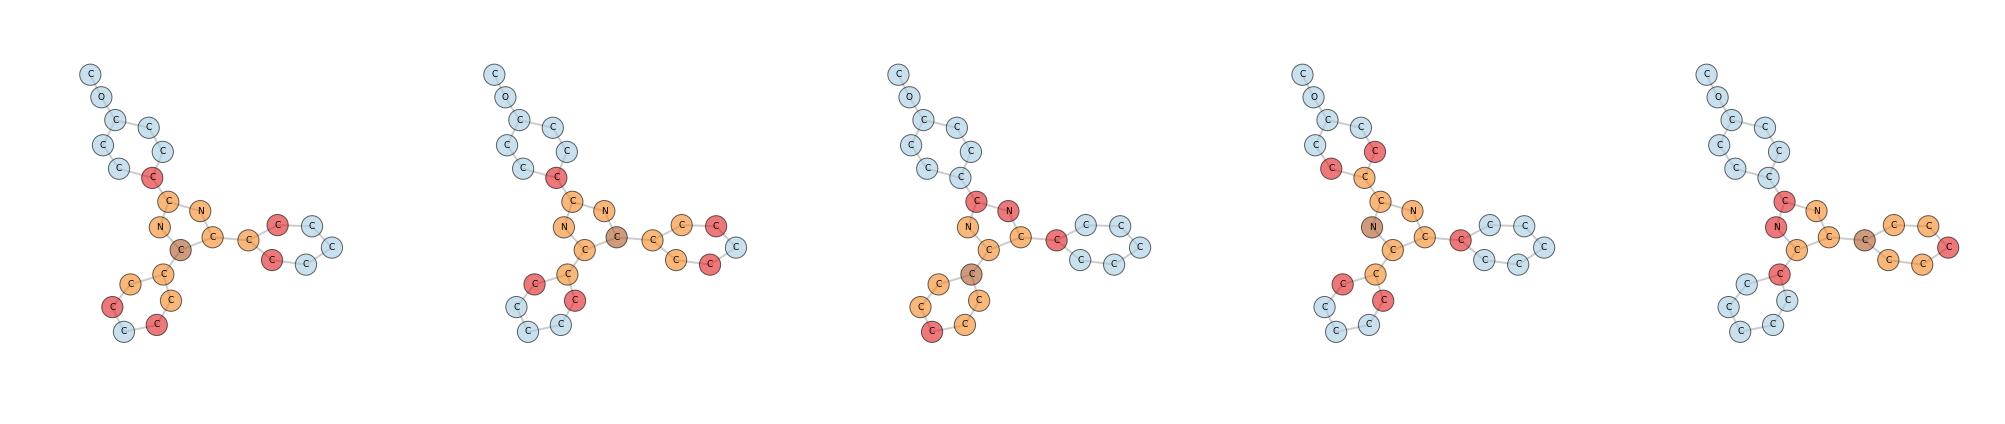

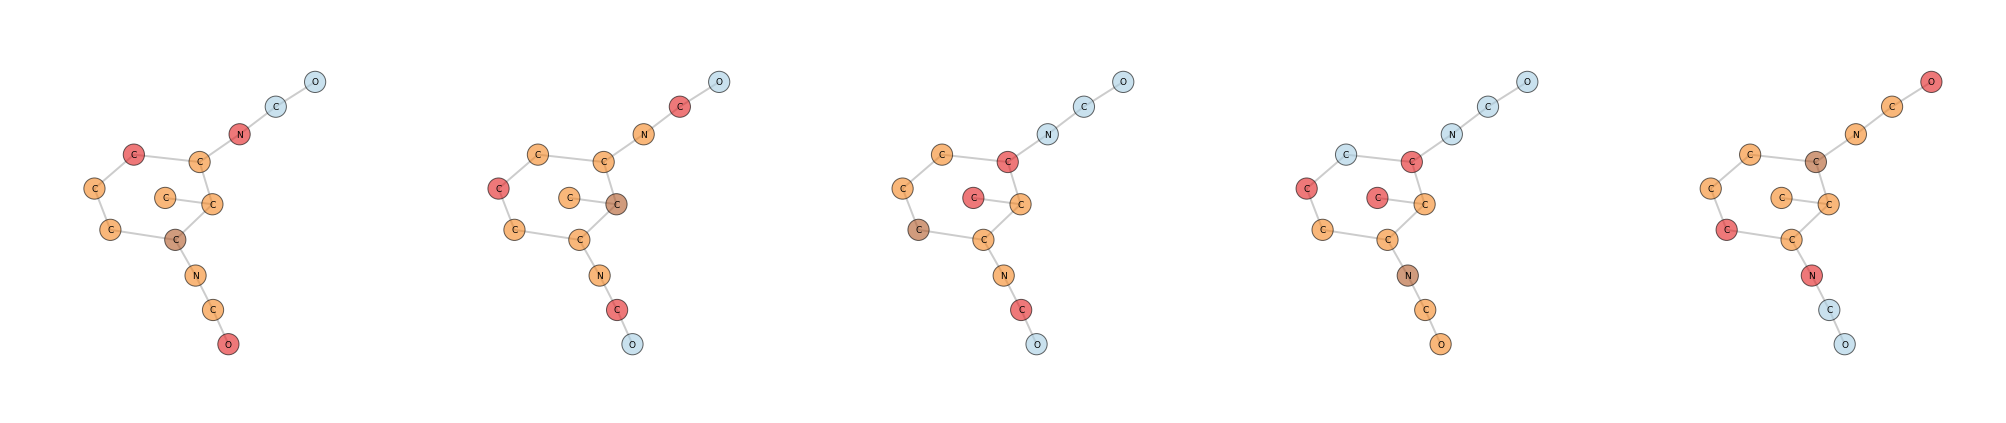

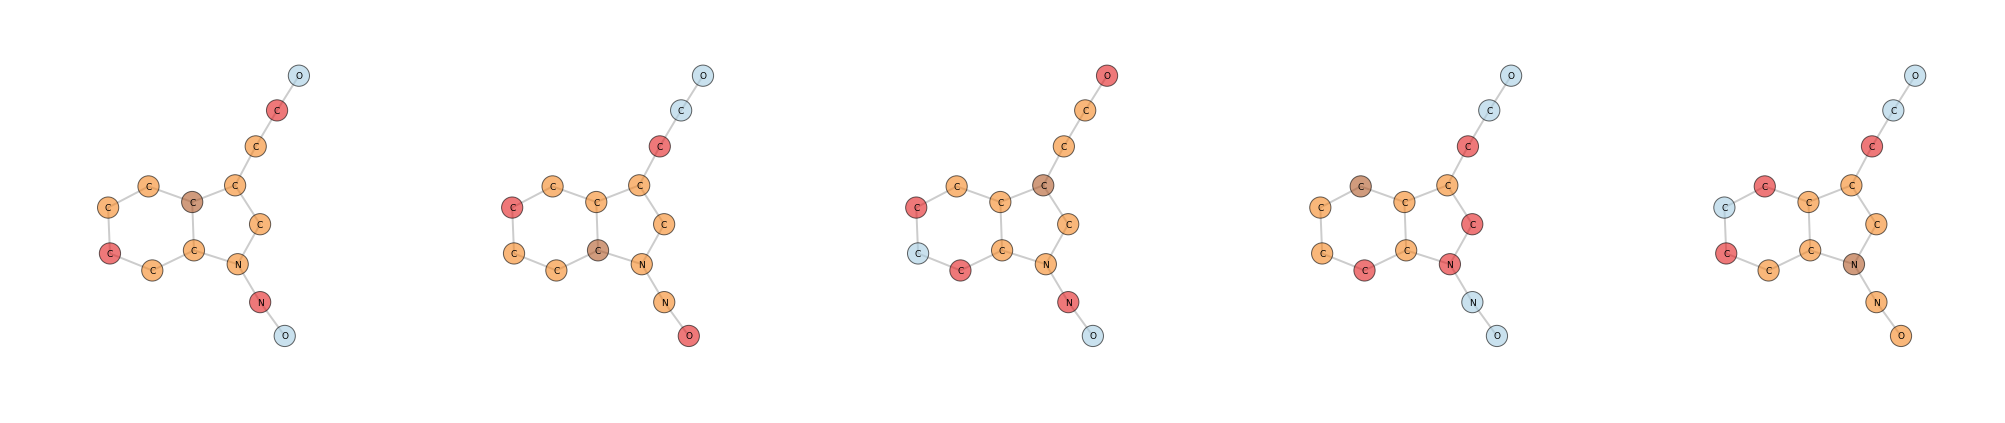

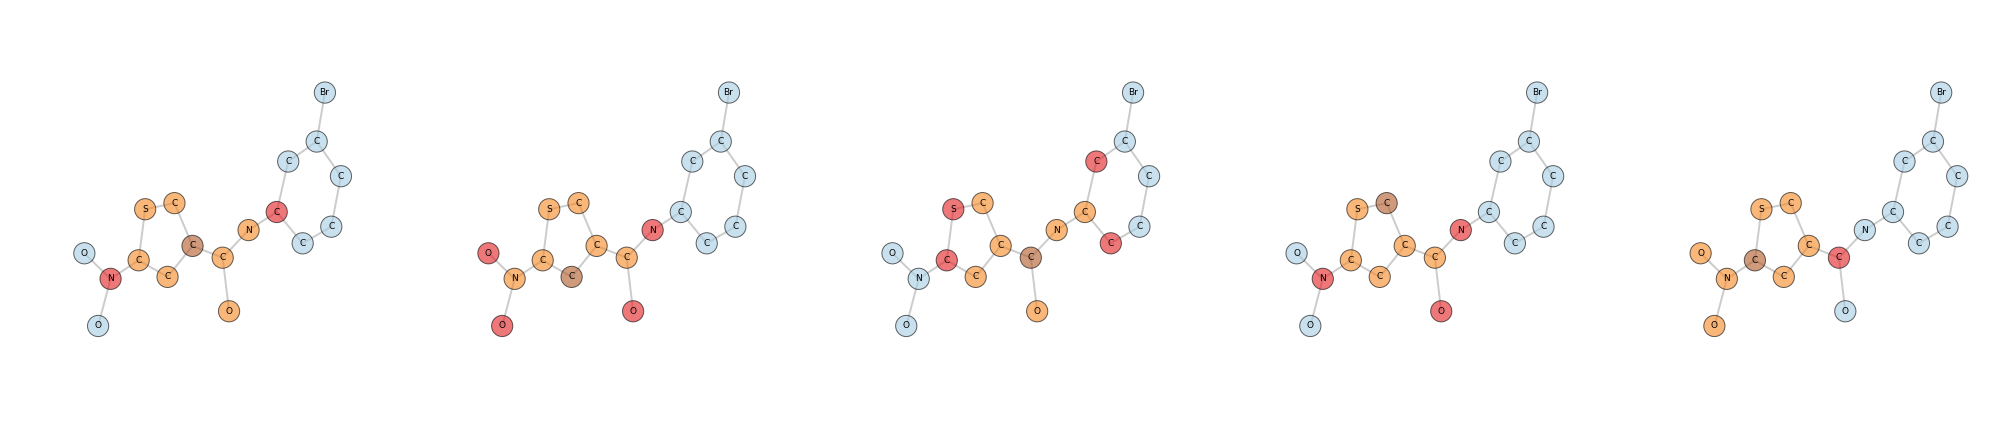

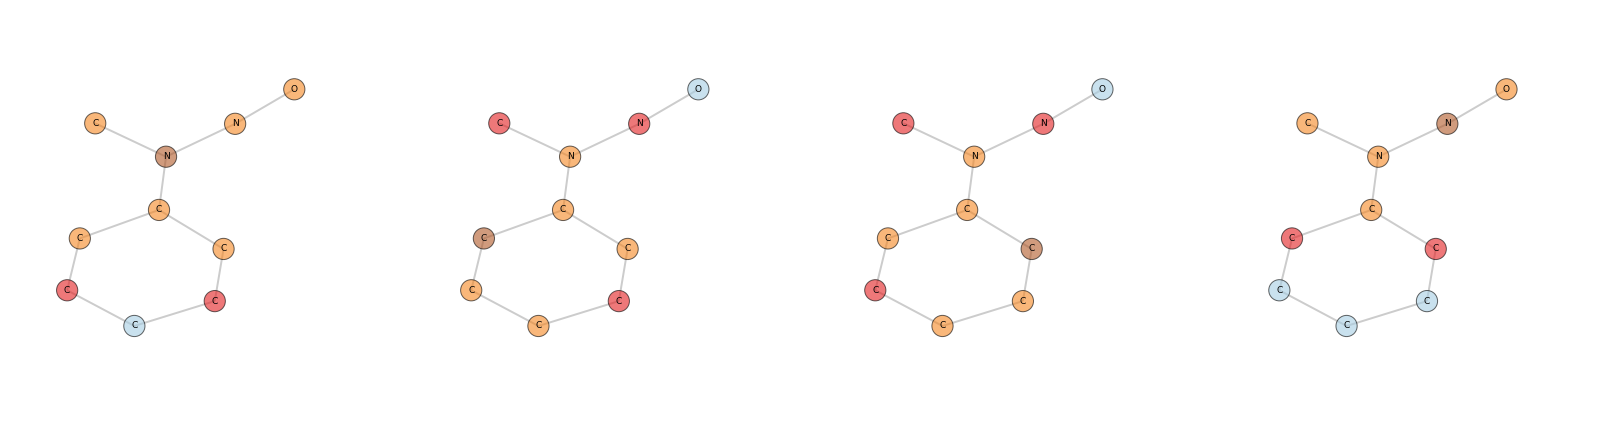

In [8]:
'''
demonstrating more extract core
'''
%matplotlib inline
import sys
sys.path.append('..')
import os
os.nice(20)
from eden.converter.graph.gspan import gspan_to_eden
import graphlearn.utils.draw as myutils
import eden.graph as eg
import graphlearn.graphlearn as gl

#get 5 grtaphs...
gr = gspan_to_eden( 'bursi.pos.gspan' )
for x in range (5):
    g=gr.next()
    # for each, pick 5 cores and extract cips 
    nice_graphs=[]
    for n in range(5):
        node=n
        a=gl.extract_core_and_interface(node,g,radius_list=[3],thickness_list=[1],vectorizer=eg.Vectorizer())
        # draw cip on the original graph and save in nice_graphs
        nice_graphs+=myutils.cip_to_graph(a, graphs=[g,g]) 
        
    # draw nice_graphs
    myutils.draw_graph_set_graphlearn(nice_graphs, 
                           n_graphs_per_line=5, size=7, 
                           colormap='Paired', invert_colormap=False,node_border=1,
                           vertex_alpha=0.6, edge_alpha=0.2, node_size=450)

In [9]:
'''
demonstrating more extract core - 3d vector labels
'''
%matplotlib inline
import sys
sys.path.append('..')
import os
os.nice(20)
from eden.converter.molecule.obabel import obabel_to_eden3d
import graphlearn.utils.draw as myutils
import eden.graph as eg
import graphlearn.graphlearn as gl
import itertools

#get 5 grtaphs...
gr = obabel_to_eden3d( 'AID2801_active.sdf' )
gr, gr_ = itertools.tee(gr)
vectorizer = eg.Vectorizer(n=3)
vectorizer.fit(gr_)


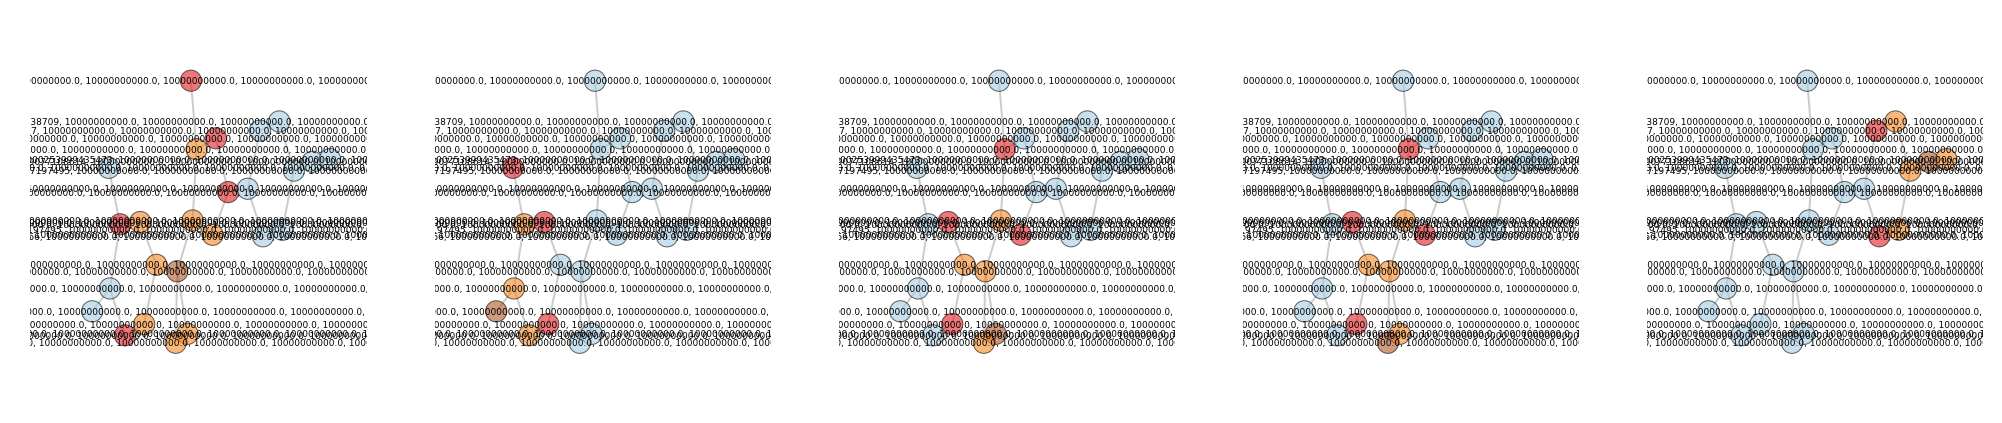

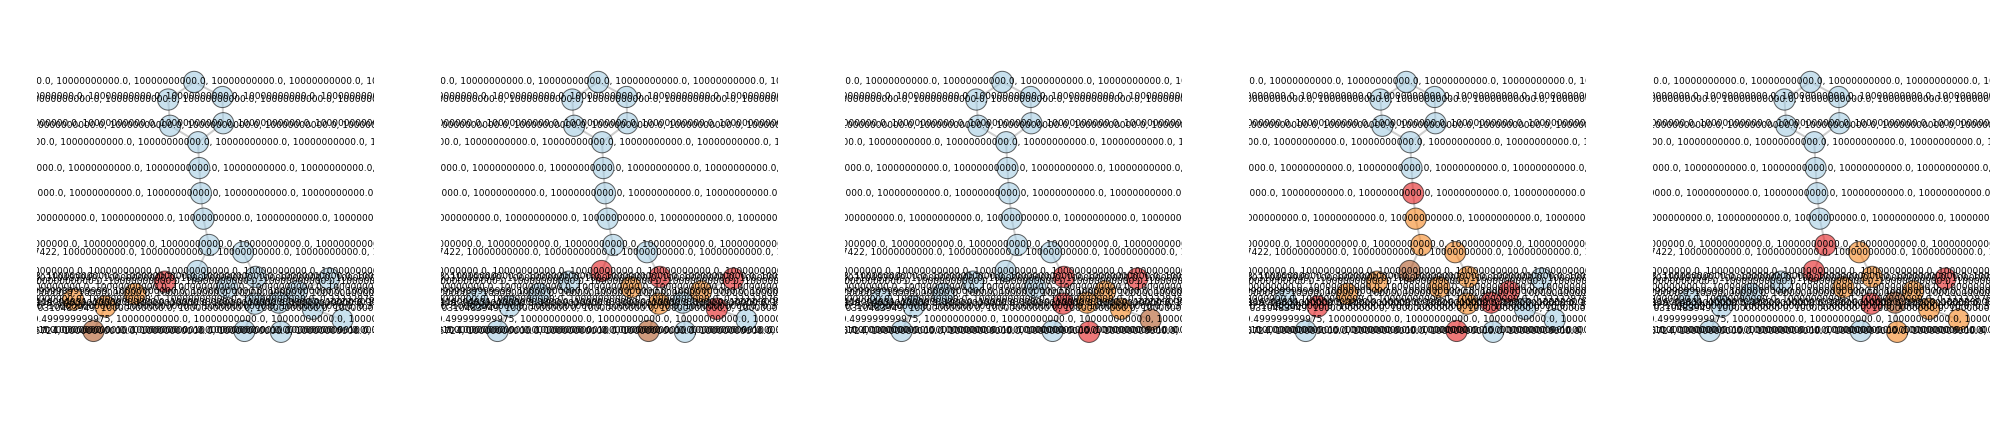

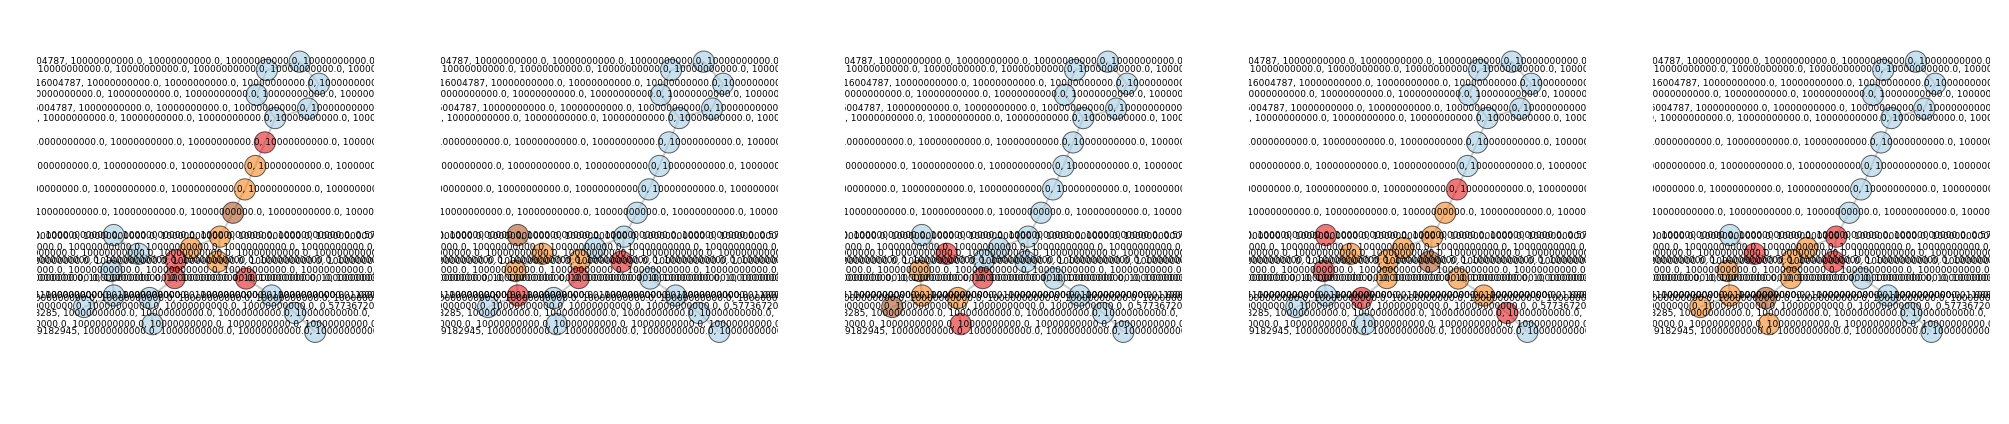

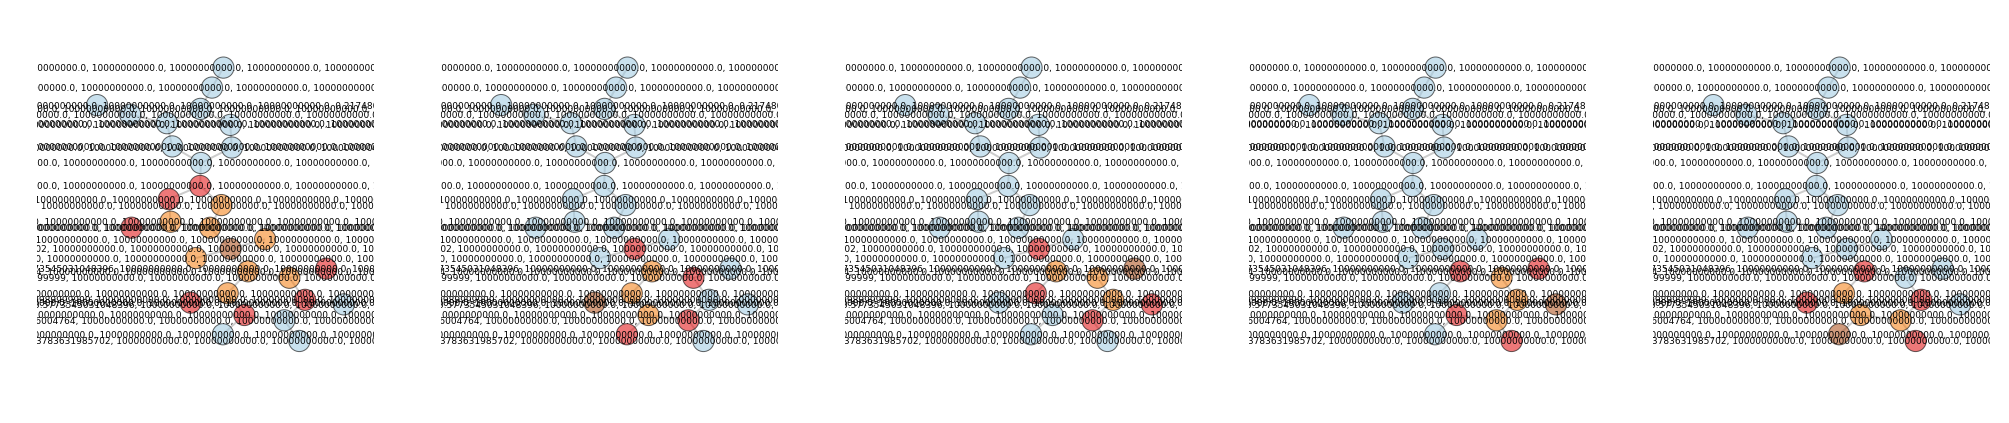

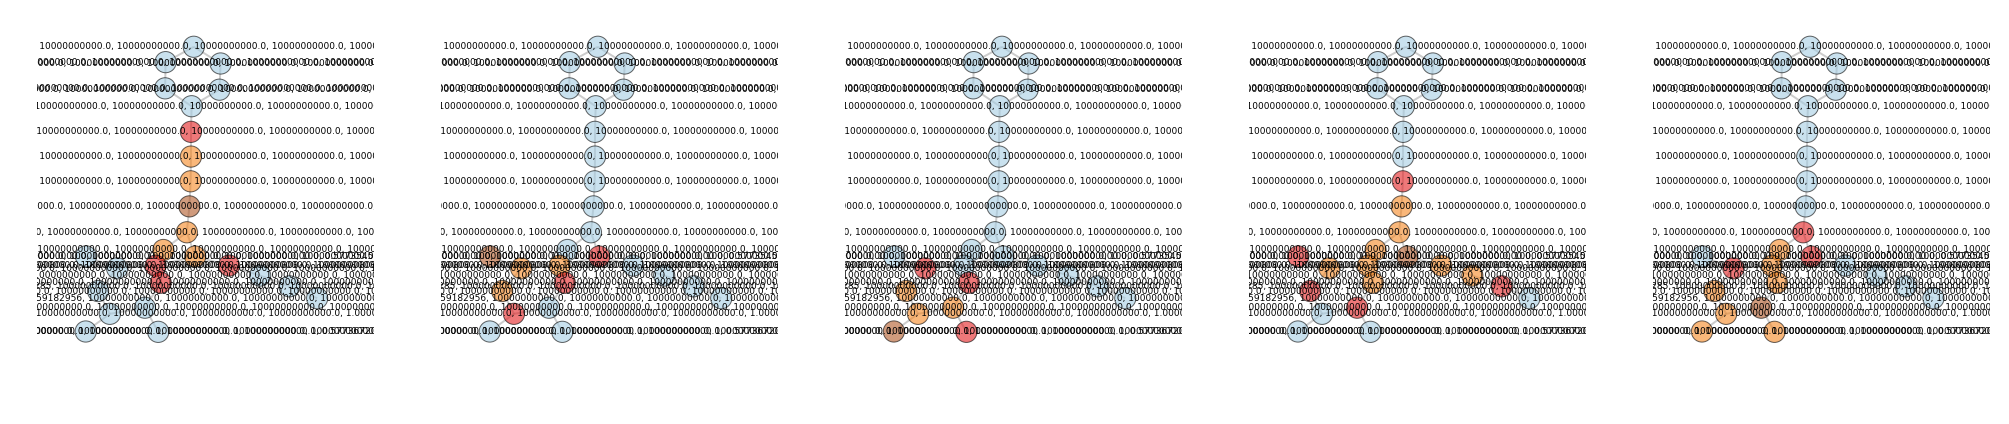

In [10]:
for x in range (5):
    g=gr.next()
    # for each, pick 5 cores and extract cips 
    nice_graphs=[]
    for n in range(5):
        node=n
        a=gl.extract_core_and_interface(node,g,radius_list=[3],thickness_list=[1],vectorizer=vectorizer)
        # draw cip on the original graph and save in nice_graphs
        nice_graphs+=myutils.cip_to_graph(a, graphs=[g,g]) 
        
    # draw nice_graphs
    myutils.draw_graph_set_graphlearn(nice_graphs, 
                           n_graphs_per_line=5, size=7, 
                           colormap='Paired', invert_colormap=False,node_border=1,
                           vertex_alpha=0.6, edge_alpha=0.2, node_size=450)

In [11]:
%%time
'''
second is reading a grammar and training an estimator
'''
import sys
sys.path.append('..')
import os 
os.nice(20)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools

# learn a grammar
training_graphs = gspan_to_eden( 'bursi.pos.gspan' )
training_size=1500
training_graphs = itertools.islice(training_graphs,training_size)
sampler=gl.GraphLearnSampler(radius_list=[0,1,2],thickness_list=[1,2])
sampler.fit(training_graphs,n_jobs=-1, core_interface_pair_remove_threshold=3, interface_remove_threshold=3)
sampler.save('tmp/demo_50.ge')

/home/liconj/.local/lib/python2.7/site-packages/sklearn/calibration.py:398: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/home/liconj/.local/lib/python2.7/site-packages/sklearn/calibration.py:408: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/home/liconj/.local/lib/python2.7/site-packages/sklearn/calibration.py:410: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


CPU times: user 2min 39s, sys: 3.13 s, total: 2min 42s
Wall time: 5min 43s


In [12]:
'''
Using obabel data, both normal and 3d
'''
import sys
sys.path.append('..')
import os 
os.nice(20)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.molecule.obabel import obabel_to_eden, obabel_to_eden3d
import itertools

# learn a grammar
training_graphs    = obabel_to_eden( 'AID2401_active.sdf' )
training_graphs_3d = obabel_to_eden3d('AID2401_active.sdf')
training_size = 300

In [13]:
%%time
'''
Normal data
'''
training_graphs = itertools.islice(training_graphs, training_size)
sampler = gl.GraphLearnSampler(radius_list=[0,1,2],thickness_list=[1,2])
sampler.fit(training_graphs,n_jobs=-1, core_interface_pair_remove_threshold=3, interface_remove_threshold=3)
sampler.save('tmp/demo_50.ge')

CPU times: user 36.5 s, sys: 1.47 s, total: 38 s
Wall time: 1min 38s


In [14]:
#%%time
'''
3D data
'''
training_graphs = itertools.islice(training_graphs_3d, training_size)
sampler = gl.GraphLearnSampler(radius_list=[0,1,2],thickness_list=[1,2])
sampler.fit(training_graphs_3d,n_jobs=-1, core_interface_pair_remove_threshold=3, interface_remove_threshold=3)
sampler.save('tmp/demo_50.ge')

Program run failed on Monday, 29. June 2015 03:04PM
Mapping key not found.
vector


KeyError: 'hlabel'

In [ ]:
%%time
'''
Using obabel data, both normal and 3d
'''
import sys
sys.path.append('..')
import os 
os.nice(20)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.molecule.obabel import obabel_to_eden, obabel_to_eden3d
import itertools

# learn a grammar
training_graphs    = obabel_to_eden( 'AID2801_active.sdf' )
training_graphs_3d = obabel_to_eden3d('AID2801_active.sdf')
training_size = 1500
training_graphs = itertools.islice(training_graphs,training_size)
sampler=gl.GraphLearnSampler(radius_list=[0,1,2],thickness_list=[1,2])
sampler.fit(training_graphs,n_jobs=-1, core_interface_pair_remove_threshold=3, interface_remove_threshold=3)
sampler.save('tmp/demo_50.ge')

In [ ]:
#draw production rules
myutils.draw_grammar(sampler.local_substitutable_graph_grammar.grammar,n_productions=5,
                     n_graphs_per_line=6, size=5, 
                     colormap='Paired', invert_colormap=False,node_border=1,
                     vertex_alpha=0.6, edge_alpha=0.2, node_size=450)

In [ ]:
#grammar statistics
myutils.draw_grammar_stats(sampler.local_substitutable_graph_grammar.grammar, size=(10,5))

In [ ]:
%%time
'''
Graph sampling
'''
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import graphlearn.utils.draw as myutils
import eden.graph as ge

sampler=gl.GraphLearnSampler()
sampler.load('tmp/demo_50.ge')
graphs = gspan_to_eden( 'bursi.pos.gspan' )
id_start=20
id_end=id_start+10
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=50
graphs = sampler.sample(graphs,
                        same_radius=False,
                        same_core_size=True,
                        n_samples=4,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        accept_annealing_factor=1.2,
                        probabilistic_core_choice=True,
                        burnout=1,
                        select_cip_max_tries=100,
                        keep_duplicates=False)

from eden.modifier.graph.vertex_attributes import colorize   
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    path_graphs = colorize(path_graphs,
                           output_attribute = 'color_level', 
                           labels = ['C','O','N','P','Cl','Br','S','I'])
    myutils.draw_graph_set(path_graphs,
                           n_graphs_per_line=6, size=7, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.2, node_size=650,
                          headlinehook= myutils.get_score_of_graph
                          )

In [ ]:
%matplotlib inline
from itertools import islice
import numpy as np
step=sampling_interval
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

In [ ]:
'''
first we test the core/interface extractor, since it is most essential
'''
import sys
sys.path.append('..')
%matplotlib inline
from eden.converter.graph.gspan import gspan_to_eden
from graphlearn import graphtools as gt
import graphlearn.utils.draw as myutils
import eden.graph as eg
import graphlearn.graphlearn as gl
import numpy as np

from eden.graph import Vectorizer
vectorizer=Vectorizer()

#get a graph
graphs = gspan_to_eden( 'bursi.pos.gspan' )
graph=graphs.next()
from eden.util import display
from eden.modifier.graph.vertex_attributes import colorize  
graphs = colorize([graph],output_attribute = 'color_level', labels = ['C','O','N','P','Cl','Br','S'])    
graph=graphs.next()
print 'We work on this graph'
display.draw_graph(graph, size=10, secondary_vertex_label='ID',
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                   vertex_alpha=0.5, node_size=650)


def mark_and_draw(cip):
    graph=myutils.cip_to_graph(cip)
    myutils.draw_graph_set_graphlearn(graph, 
                           n_graphs_per_line=7, size=5, 
                           colormap='Paired', invert_colormap=False,node_border=1,
                           vertex_alpha=0.6, edge_alpha=0.2, node_size=450)
    
radius_list=[0,1,2]
thickness_list=[1,2]
graph.node[1]['no_root']=True
#lets see.. without filter:
cip=gl.extract_core_and_interface(1,graph,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'no filter'
mark_and_draw(cip)


# lets do the same but with the filter
cip=gl.extract_core_and_interface(1,graph,filter=gt.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter: nothing should appear,,,'
mark_and_draw(cip)

# filter is ignoring unfiltered things:
cip=gl.extract_core_and_interface(2,graph,filter=gt.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but we chose node 2 as root'
mark_and_draw(cip)


# no core attribute
graph.node[1]["not_in_core"]=True
graph.node[1].pop('no_root')
cip=gl.extract_core_and_interface(2,graph,filter=gt.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but node "1" cant be part of a core, we gave 0 and 2 as radius list and only radius 2 will show up'
mark_and_draw(cip)